#### Policy Iteration

Using the GridWorld implementation discussed in the example sets (https://github.com/drmaj/gridworldsgym), implement the policy iteration algorithm. Verify that the algorithm works on GridWorld-v0 and then test it on the remaining gridworlds.

In [35]:
%matplotlib inline
import time
import gym
import gridworldsgym
import numpy as np
import math
import random
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

In [36]:
def policy_iteration(env, gamma=0.999):
    states = [s for s in range(env.num_states)]
    actions = [a for a in range(env.num_actions)]
    pi = {s: random.randint(0,3) for s in range(env.num_states)}
    pi1 = {s: random.randint(0,3) for s in range(env.num_states)}
    R, P = env.R, env.P
    illegal_states = [x*env.width+y for x,y in env.illegal_states]
    goal_states = [x*env.width+y for x,y in env.goal_states]
    
    y = [R(s) for s in states]
    y = np.asarray(y)
    y[goal_states] = +100.0 #The R function returns -1 even for the goal state. Therefore, updating here manually.
    
    converged = False
    while not converged:    
        A = []
        x = []
        for s in states:
            lA = np.zeros(env.num_states)
            lA[s] = 1
            lactions = pi[s] if not math.isnan(pi[s]) else 0
            for (p, s_prime, _) in P(s, lactions):
                if s != s_prime:
                    lA[s_prime] = -gamma * p
            A.append(lA)
        
        A = np.reshape(A, (env.num_states, env.num_states))
        cA = np.delete(np.delete(A, illegal_states, 0), illegal_states, 1)
        cy = np.delete(y, illegal_states, 0)
        x = np.linalg.solve(cA, cy)
        x = np.insert(x, illegal_states, float('nan'))
        for s in states:
            action_vector = [sum(p * x[s_prime] for (p, s_prime, _) in P(s, a)) for a in actions]
            pi1[s] = np.argmax(action_vector)

        if (all(pi1[i] == pi[i] for i in range(env.num_states))):
            converged = True
        pi = pi1.copy()
    
    return pi

In [37]:
env = gym.make('GridWorld-v0')
state = env.reset()

In [38]:
pi_star = policy_iteration(env)
pi_star

{0: 1, 1: 1, 2: 2, 3: 3, 4: 2, 5: 1, 6: 2, 7: 0, 8: 1, 9: 1, 10: 1, 11: 0}

In [39]:
def pretty_print(pi, env):
    grid = np.zeros((env.height, env.width))
    for state, direction in pi.items():
        row, col = env.to_row_col(state)
        grid[row][col] = direction
    print(grid)

In [40]:
pretty_print(pi_star,env)

[[1. 1. 2. 3.]
 [2. 1. 2. 0.]
 [1. 1. 1. 0.]]


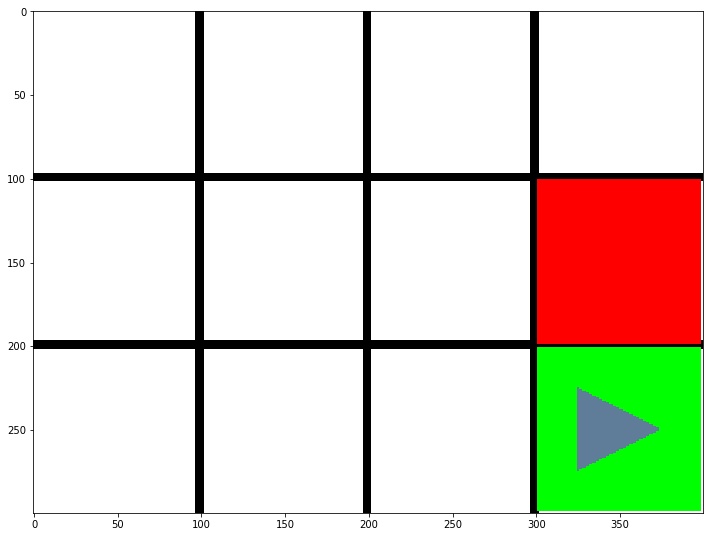

In [41]:
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
actions = [a for a in range(env.num_actions)]
done = False
time.sleep(0.5)
img.set_data(env.render(mode='rgb_array'))
display.display(plt.gcf())
while not done:
    display.clear_output(wait=True)
    time.sleep(0.5)
    action = pi_star[state]
    state, reward, done, info = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
display.clear_output(wait=True)
    
env.close()
env = None

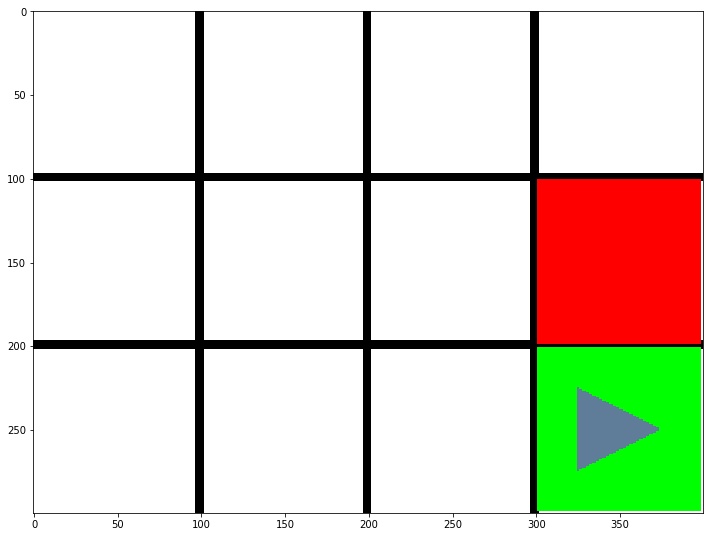

In [43]:
env = gym.make('SlipperyGridWorld-v0')
#env = gym.make('CliffGridWorld-v0')
state = env.reset()
pi_star = policy_iteration(env)
pretty_print(pi_star,env)
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
actions = [a for a in range(env.num_actions)]
done = False
time.sleep(0.5)
img.set_data(env.render(mode='rgb_array'))
display.display(plt.gcf())
while not done:
    display.clear_output(wait=True)
    time.sleep(0.5)
    action = pi_star[state]
    state, reward, done, info = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
display.clear_output(wait=True)
    
env.close()
env = None

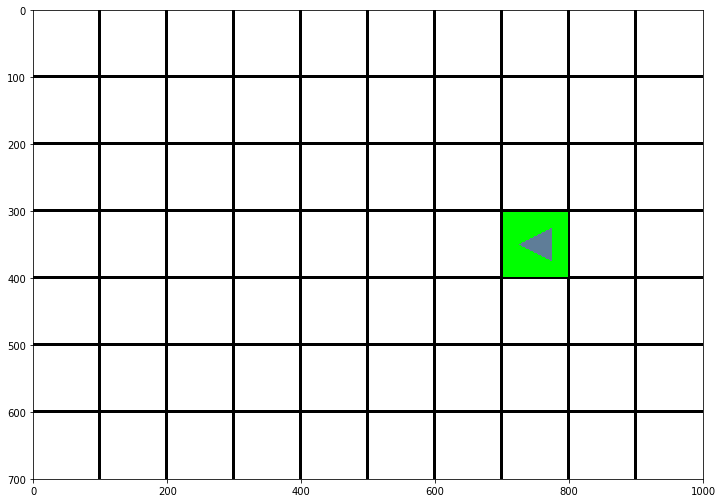

In [44]:
env = gym.make('WindyGridWorld-v0')
#env = gym.make('CliffGridWorld-v0')
state = env.reset()
pi_star = policy_iteration(env)
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
actions = [a for a in range(env.num_actions)]
done = False
time.sleep(0.5)
img.set_data(env.render(mode='rgb_array'))
display.display(plt.gcf())
while not done:
    display.clear_output(wait=True)
    time.sleep(0.5)
    action = pi_star[state]
    state, reward, done, info = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
display.clear_output(wait=True)
    
env.close()
env = None

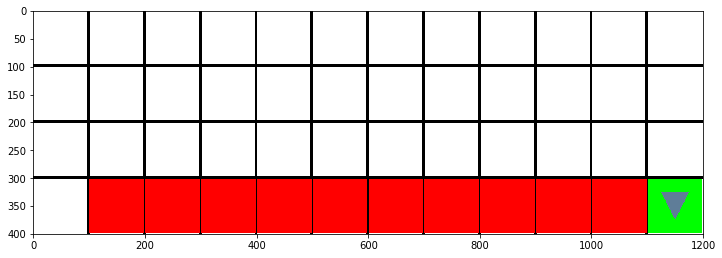

In [45]:
env = gym.make('CliffGridWorld-v0')
#env = gym.make('CliffGridWorld-v0')
state = env.reset()
pi_star = policy_iteration(env)
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
actions = [a for a in range(env.num_actions)]
done = False
time.sleep(0.5)
img.set_data(env.render(mode='rgb_array'))
display.display(plt.gcf())
while not done:
    display.clear_output(wait=True)
    time.sleep(0.5)
    action = pi_star[state]
    state, reward, done, info = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
display.clear_output(wait=True)
    
env.close()
env = None